In [1]:
from urllib.request import urlopen
import json
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time

def distancia(dataframe):
    dataframe['dist_per'] = ((dataframe['x']- dataframe['x'].shift(-1))**2 +
                            (dataframe['y']- dataframe['y'].shift(-1))**2 +
                            (dataframe['z']- dataframe['z'].shift(-1))**2)**(1/2)
    x= dataframe.columns.get_loc('x')
    y= dataframe.columns.get_loc('y')
    z =dataframe.columns.get_loc('z')

    dataframe.iat[len(dataframe)-1,dataframe.columns.get_loc('dist_per')] = ((dataframe.iat[0,x]- dataframe.iat[len(dataframe)-1,x])**2 
                                                 + (dataframe.iat[0,y]- dataframe.iat[len(dataframe) -1,y])**2
                                                 + (dataframe.iat[0,z]- dataframe.iat[len(dataframe)-1,y])**2)**(1/2)

def velocidade_curva(curva,escala):
    distancia(curva)
    distancia_curva = curva['dist_per'].sum()- curva.iat[len(curva)-1, curva.columns.get_loc('dist_per')]
    temp_inicio = pd.to_datetime(curva.index.min())
    temp_final = pd.to_datetime(curva.index.max())
    intervalo = (temp_final-temp_inicio).total_seconds()
    velocidade = distancia_curva/((intervalo/3600)*escala)
    return velocidade








In [2]:
retorno0 = requests.get("https://api.openf1.org/v1/sessions?date_start%3E%3D2025-03-01&date_end%3C%3D2025-08-30&session_type=Qualifying", timeout= 20)
while retorno0.status_code != 200:
    time.sleep(2)
    retorno0 = requests.get("https://api.openf1.org/v1/sessions?date_start%3E%3D2025-03-01&date_end%3C%3D2025-08-30&session_type=Qualifying", timeout= 20)
    
sessoes = pd.DataFrame(json.loads(retorno0.text))
sessoes

,meeting_key,session_key,location,date_start,date_end,session_type,session_name,country_key,country_code,country_name,circuit_key,circuit_short_name,gmt_offset,year
0,1254,9689,Melbourne,2025-03-15T05:00:00+00:00,2025-03-15T06:00:00+00:00,Qualifying,Qualifying,5,AUS,Australia,10,Melbourne,11:00:00,2025
1,1255,9989,Shanghai,2025-03-21T07:30:00+00:00,2025-03-21T08:14:00+00:00,Qualifying,Sprint Qualifying,53,CHN,China,49,Shanghai,08:00:00,2025
2,1255,9994,Shanghai,2025-03-22T07:00:00+00:00,2025-03-22T08:00:00+00:00,Qualifying,Qualifying,53,CHN,China,49,Shanghai,08:00:00,2025
3,1256,10002,Suzuka,2025-04-05T06:00:00+00:00,2025-04-05T07:00:00+00:00,Qualifying,Qualifying,4,JPN,Japan,46,Suzuka,09:00:00,2025
4,1257,10010,Sakhir,2025-04-12T16:00:00+00:00,2025-04-12T17:00:00+00:00,Qualifying,Qualifying,36,BRN,Bahrain,63,Sakhir,03:00:00,2025
5,1258,10018,Jeddah,2025-04-19T17:00:00+00:00,2025-04-19T18:00:00+00:00,Qualifying,Qualifying,153,KSA,Saudi Arabia,149,Jeddah,03:00:00,2025
6,1259,10024,Miami,2025-05-02T20:30:00+00:00,2025-05-02T21:14:00+00:00,Qualifying,Sprint Qualifying,19,USA,United States,151,Miami,-04:00:00,2025
7,1259,10029,Miami,2025-05-03T20:00:00+00:00,2025-05-03T21:00:00+00:00,Qualifying,Qualifying,19,USA,United States,151,Miami,-04:00:00,2025
8,1260,9983,Imola,2025-05-17T14:00:00+00:00,2025-05-17T15:00:00+00:00,Qualifying,Qualifying,13,ITA,Italy,6,Imola,02:00:00,2025
9,1261,9975,Monaco,2025-05-24T14:00:00+00:00,2025-05-24T15:00:00+00:00,Qualifying,Qualifying,114,MON,Monaco,22,Monte Carlo,02:00:00,2025


In [3]:
def pilotos_na_sessao(sessao):
    retorno1 =requests.get(f"https://api.openf1.org/v1/drivers?session_key={sessao}", timeout= 20)
    while retorno1.status_code != 200:
        time.sleep(2)
        retorno1 =requests.get(f"https://api.openf1.org/v1/drivers?session_key={sessao}", timeout= 20)
    pilotos = pd.DataFrame(json.loads(retorno1.text))
    pilotos = pilotos.drop(columns=['meeting_key','session_key','broadcast_name','team_colour','first_name','last_name','headshot_url','country_code'])
    return pilotos


In [4]:
def voltas(piloto,sessao):
    retorno2 = requests.get(f"https://api.openf1.org/v1/laps?driver_number={piloto}&session_key={sessao}", timeout=20)
    while retorno2.status_code != 200:
        time.sleep(2)
        retorno2 = requests.get(f"https://api.openf1.org/v1/laps?driver_number={piloto}&session_key={sessao}", timeout=20)
    classificacao = pd.DataFrame(json.loads(retorno2.text))
    if len(classificacao)>2:
        return classificacao
    else:
        return None

In [5]:
def volta_rapida(classificacao,piloto,sessao):
    linha = list(classificacao[classificacao['lap_duration'] == classificacao['lap_duration'].min()].index)
    inicio_volta = classificacao.iloc[linha[0], 4]
    final_volta = classificacao.iloc[linha[0]+1,4]
    retorno3 =  requests.get(f"https://api.openf1.org/v1/location?driver_number={piloto}&session_key={sessao}&date>={inicio_volta}&date<={final_volta}", timeout = 20)
    while retorno3.status_code != 200:
        time.sleep(2)
        retorno3 =  requests.get(f"https://api.openf1.org/v1/location?driver_number={piloto}&session_key={sessao}&date>={inicio_volta}&date<={final_volta}", timeout = 20)
    voltas_base = pd.DataFrame(json.loads(retorno3.text))
    return voltas_base,inicio_volta,final_volta


In [6]:
def telemetria(piloto,sessao,inicio_volta,final_volta):
    retorno4 =  requests.get(f"https://api.openf1.org/v1/car_data?driver_number={piloto}&session_key={sessao}&date>={inicio_volta}&date<={final_volta}", timeout = 20)
    while retorno4.status_code != 200:
        time.sleep(2)
        retorno4 =  requests.get(f"https://api.openf1.org/v1/car_data?driver_number={piloto}&session_key={sessao}&date>={inicio_volta}&date<={final_volta}", timeout = 20)
    carro = pd.DataFrame(json.loads(retorno4.text))
    carro = carro.drop(columns=['session_key','meeting_key','driver_number'])
    return carro

In [7]:
def unir_telemetria_volta_rapida(voltas_base,carro):
    voltas_base['date']= pd.to_datetime(voltas_base['date'])
    voltas_base.set_index('date', inplace=True)
    carro['date']= pd.to_datetime(carro['date'], errors='coerce', format ='ISO8601')
    carro.set_index('date', inplace=True)

    voltas_completa = voltas_base.join(carro, how='outer', lsuffix='_base',rsuffix='_carro')
    return voltas_completa

In [8]:
def mudar_index(voltas_base,voltas_completa,carro):
    novo_tempo = pd.date_range(start=min(voltas_base.index.min(),carro.index.min()),end=max(voltas_base.index.max(),carro.index.max()),freq=pd.to_timedelta(1 / 3.7, unit='s'))
    novo_index = novo_tempo.union(voltas_completa.index)
    voltas_reindex = voltas_completa.reindex(novo_index)
    return voltas_reindex

In [9]:
def interpolar(voltas_reindex):
    voltas_final = voltas_reindex.interpolate(method='time')
    distancia(voltas_final)
    return voltas_final

In [10]:
pilotos = pilotos_na_sessao(sessoes.loc[0,'session_key'])
classificacao_exemplo = voltas(16, sessoes.loc[0,'session_key'])
classificacao_exemplo


,meeting_key,session_key,driver_number,lap_number,date_start,duration_sector_1,duration_sector_2,duration_sector_3,i1_speed,i2_speed,is_pit_out_lap,lap_duration,segments_sector_1,segments_sector_2,segments_sector_3,st_speed
0,1254,9689,16,1,2025-03-15T05:02:04.134000+00:00,58.882,23.741,39.966,258,291,True,122.589,"[2064, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049]",49
1,1254,9689,16,2,2025-03-15T05:04:02.185000+00:00,26.558,17.265,32.630,290,323,False,76.453,"[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2051, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2051, 2049, 2049, 2049]",324
2,1254,9689,16,3,2025-03-15T05:05:18.735000+00:00,38.091,21.577,62.517,236,214,False,122.185,"[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2064, 2064]",226
3,1254,9689,16,4,2025-03-15T05:07:22.848000+00:00,43.035,22.565,NaN,252,264,True,NaN,"[2064, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048]","[0, 0, 0, 0, 0, 0, 0, 0]",171
4,1254,9689,16,5,2025-03-15T05:09:07.483000+00:00,26.411,17.144,32.474,290,322,False,84.614,"[2049, 2049, 2049, 2049, 2049, 2048, 2049, 204...","[2051, 2049, 2049, 2049, 2048]","[2048, 2049, 2049, 2049, 2048, 2049, 2049, 2049]",325
5,1254,9689,16,6,2025-03-15T05:10:23.515000+00:00,33.482,20.006,NaN,258,251,False,NaN,"[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 0]","[0, 0, 0, 0, 0, 0, 0, 0]",260
6,1254,9689,16,7,2025-03-15T05:16:02.769000+00:00,73.514,21.565,NaN,263,289,True,NaN,"[2064, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048]","[0, 0, 0, 0, 0, 0, 0, 0]",114
7,1254,9689,16,8,2025-03-15T05:25:09.411000+00:00,51.924,19.020,36.888,256,301,True,107.832,"[2064, 2049, 2049, 2049, 2051, 2049, 2049, 204...","[2051, 2051, 2051, 2051, 2051]","[2051, 2051, 2051, 2051, 2049, 2049, 2049, 2049]",55
8,1254,9689,16,9,2025-03-15T05:26:51.251000+00:00,26.324,17.048,32.466,290,324,False,75.838,"[2049, 2049, 2049, 2049, 2049, 2051, 2049, 204...","[2051, 2051, 2049, 2049, 2049]","[2049, 2049, 2049, 2051, 2049, 2049, 2049, 0]",322
9,1254,9689,16,10,2025-03-15T05:28:07.099000+00:00,30.799,22.755,NaN,266,256,False,NaN,"[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048]","[0, 0, 0, 0, 0, 0, 0, 0]",253


In [11]:
volta_exemplo,inicio_volta,final_volta = volta_rapida(classificacao_exemplo,16,sessoes.loc[0,'session_key'])
volta_exemplo


,date,session_key,meeting_key,driver_number,z,x,y
0,2025-03-15T05:50:07.887000+00:00,9689,1254,16,84,-1255,-1277
1,2025-03-15T05:50:08.088000+00:00,9689,1254,16,83,-1434,-1107
2,2025-03-15T05:50:08.507000+00:00,9689,1254,16,82,-1651,-900
3,2025-03-15T05:50:08.668000+00:00,9689,1254,16,80,-1754,-802
4,2025-03-15T05:50:08.868000+00:00,9689,1254,16,79,-1884,-679
...,...,...,...,...,...,...,...
281,2025-03-15T05:51:22.487000+00:00,9689,1254,16,89,-532,-1964
282,2025-03-15T05:51:22.648000+00:00,9689,1254,16,88,-630,-1871
283,2025-03-15T05:51:22.908000+00:00,9689,1254,16,88,-790,-1719
284,2025-03-15T05:51:23.148000+00:00,9689,1254,16,86,-927,-1589


In [12]:
dados_carro = telemetria(16,sessoes.loc[0,'session_key'],inicio_volta,final_volta)
dados_carro


,date,rpm,speed,brake,throttle,drs,n_gear
0,2025-03-15T05:50:07.960000+00:00,11240,316,0,100,12,8
1,2025-03-15T05:50:08.200000+00:00,11303,318,0,100,12,8
2,2025-03-15T05:50:08.440000+00:00,11337,319,0,100,12,8
3,2025-03-15T05:50:08.600000+00:00,11337,321,0,100,12,8
4,2025-03-15T05:50:08.920000+00:00,11467,323,0,100,12,8
...,...,...,...,...,...,...,...
282,2025-03-15T05:51:22.361000+00:00,10736,301,0,100,12,8
283,2025-03-15T05:51:22.761000+00:00,10893,306,0,100,12,8
284,2025-03-15T05:51:22.921000+00:00,10990,307,0,100,12,8
285,2025-03-15T05:51:23.241000+00:00,11065,310,0,100,12,8


In [13]:
volta_final= interpolar(mudar_index(volta_exemplo,unir_telemetria_volta_rapida(volta_exemplo,dados_carro),dados_carro))
volta_final

,session_key,meeting_key,driver_number,z,x,y,rpm,speed,brake,throttle,drs,n_gear,dist_per
2025-03-15 05:50:07.887000+00:00,9689.0,1254.0,16.0,84.000000,-1255.000000,-1277.000000,NaN,NaN,NaN,NaN,NaN,NaN,89.657146
2025-03-15 05:50:07.960000+00:00,9689.0,1254.0,16.0,83.636816,-1320.009914,-1215.258741,11240.000000,316.000000,0.0,100.0,12.0,8.0,157.207189
2025-03-15 05:50:08.088000+00:00,9689.0,1254.0,16.0,83.000000,-1434.000000,-1107.000000,11273.600000,317.066667,0.0,100.0,12.0,8.0,49.580035
2025-03-15 05:50:08.157270270+00:00,9689.0,1254.0,16.0,82.834677,-1469.875052,-1072.778176,11291.783446,317.643919,0.0,100.0,12.0,8.0,30.583703
2025-03-15 05:50:08.200000+00:00,9689.0,1254.0,16.0,82.732697,-1492.004764,-1051.668266,11303.000000,318.000000,0.0,100.0,12.0,8.0,162.861567
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-15 05:51:23.148000+00:00,9689.0,1254.0,16.0,86.000000,-927.000000,-1589.000000,11043.203140,309.128126,0.0,100.0,12.0,8.0,79.595124
2025-03-15 05:51:23.241000+00:00,9689.0,1254.0,16.0,86.000000,-984.659960,-1534.130038,11065.000000,310.000000,0.0,100.0,12.0,8.0,5.991090
2025-03-15 05:51:23.248000+00:00,9689.0,1254.0,16.0,86.000000,-989.000000,-1530.000000,11067.900027,310.075001,0.0,100.0,12.0,8.0,0.000000
2025-03-15 05:51:23.292405330+00:00,9689.0,1254.0,16.0,86.000000,-989.000000,-1530.000000,11086.296486,310.550771,0.0,100.0,12.0,8.0,0.000000


<Axes: xlabel='x', ylabel='y'>

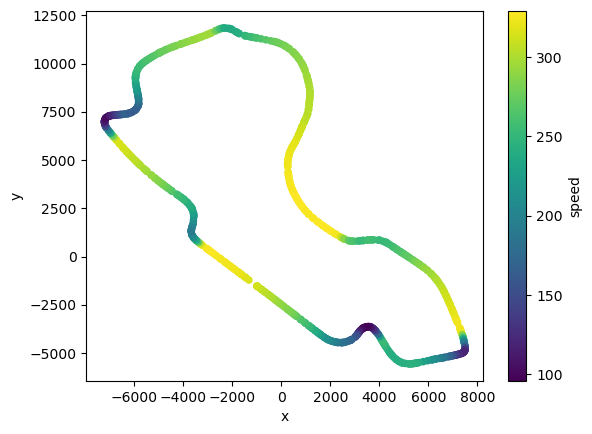

In [14]:
volta_final.plot.scatter(x='x',y='y',c='speed')

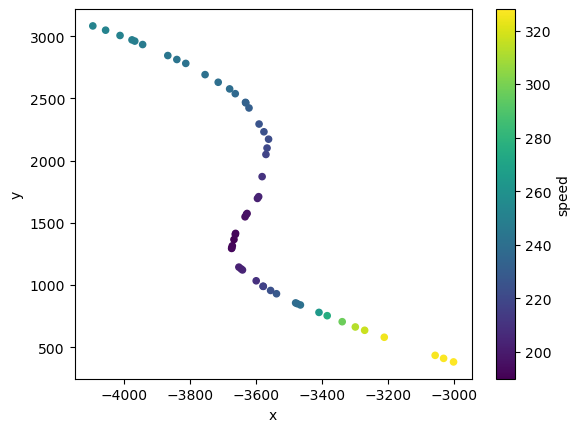

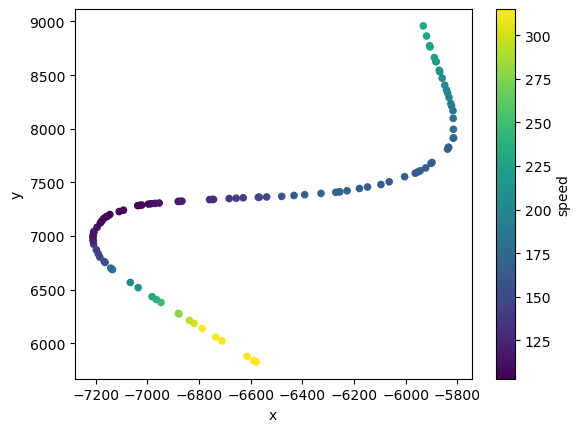

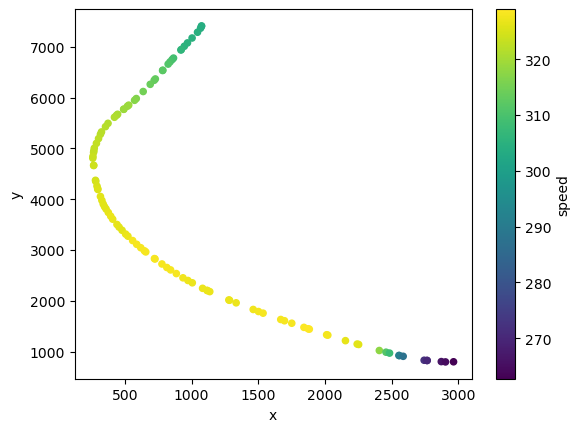

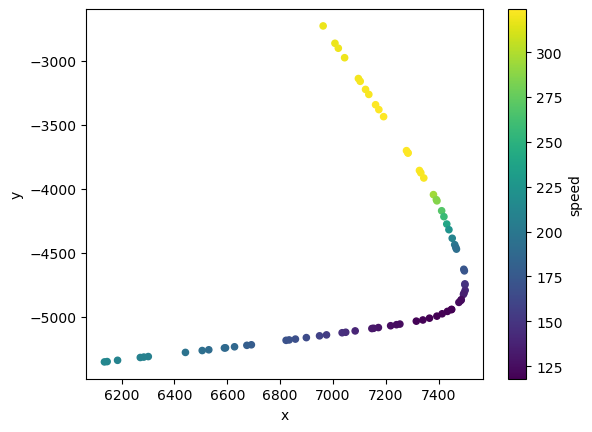

In [15]:
def curvas(volta_final):
    curva01x = (volta_final['x']<=-3000) & (volta_final['x']>=-4100)
    curva01y = (volta_final['y']<=4900) & (volta_final['y']>=-1100)
    curva01 = volta_final[curva01x & curva01y].copy()
    

    curva02x = (volta_final['x']<=-5000) & (volta_final['x']>=-8000)
    curva02y = (volta_final['y']<=9000) & (volta_final['y']>=5700) 
    curva02 = volta_final[curva02x & curva02y].copy()
    

    curva03x = (volta_final['x']<=3000) & (volta_final['x']>=0)
    curva03y = (volta_final['y']<=7500)& (volta_final['y']>=200)
    curva03 = volta_final[curva03x & curva03y].copy()
    

    curva04x = (volta_final['x']<=8000) & (volta_final['x']>=6000)
    curva04y = (volta_final['y']<=-2700) & (volta_final['y']>=-6000)
    curva04 = volta_final[curva04x & curva04y].copy()
    

    return [curva01,curva02,curva03,curva04]

setores = curvas(volta_final)
for curva in setores:
    curva.plot.scatter(x='x',y='y',c='speed')

In [16]:
distancia_volta = volta_final['dist_per'].sum() 
distancia_real = 5.278 
escala = distancia_volta/distancia_real 
print(escala)


10172.989325964843


In [17]:
for i in range(len(setores)):
    pilotos[f'curva {i+1}'] = pd.NA
for piloto in pilotos['driver_number']:
    
    classificacao_exemplo = voltas(piloto, sessoes.loc[0,'session_key'])
    if classificacao_exemplo is not None:
        volta_exemplo,inicio_volta,final_volta = volta_rapida(classificacao_exemplo,piloto,sessoes.loc[0,'session_key'])
        dados_carro = telemetria(piloto,sessoes.loc[0,'session_key'],inicio_volta,final_volta)
        volta_final= interpolar(mudar_index(volta_exemplo,unir_telemetria_volta_rapida(volta_exemplo,dados_carro),dados_carro))
        setores = curvas(volta_final)
        for i in range(len(setores)):
            indice = pilotos[pilotos['driver_number']== piloto].index[0]
            pilotos.at[indice, f'curva {i+1}']= velocidade_curva(setores[i],escala)
        print(f'Piloto {piloto} OK!') 
    else:
        for i in range(len(setores)):
            indice = pilotos[pilotos['driver_number']== piloto].index[0]
            pilotos.loc[indice, f'curva {i+1}']= 0
        print(f'Piloto {piloto} Sem voltas!') 

Piloto 1 OK!
Piloto 4 OK!
Piloto 5 OK!
Piloto 6 OK!
Piloto 7 OK!
Piloto 10 OK!
Piloto 12 OK!
Piloto 14 OK!
Piloto 16 OK!
Piloto 18 OK!
Piloto 22 OK!
Piloto 23 OK!
Piloto 27 OK!
Piloto 30 OK!
Piloto 31 OK!
Piloto 44 OK!
Piloto 55 OK!
Piloto 63 OK!
Piloto 81 OK!
Piloto 87 Sem voltas!


In [18]:
pilotos


,driver_number,full_name,name_acronym,team_name,curva 1,curva 2,curva 3,curva 4
0,1,Max VERSTAPPEN,VER,Red Bull Racing,228.594062,172.028586,315.465438,193.95283
1,4,Lando NORRIS,NOR,McLaren,226.084442,172.459788,311.618661,202.622934
2,5,Gabriel BORTOLETO,BOR,Kick Sauber,214.78799,168.047769,308.269064,198.803857
3,6,Isack HADJAR,HAD,Racing Bulls,217.0397,168.412922,308.526236,205.681335
4,7,Jack DOOHAN,DOO,Alpine,215.188802,170.778342,310.150939,193.953301
5,10,Pierre GASLY,GAS,Alpine,219.499963,168.54501,311.551515,193.656271
6,12,Andrea Kimi ANTONELLI,ANT,Mercedes,214.120456,170.598965,309.596726,196.834236
7,14,Fernando ALONSO,ALO,Aston Martin,221.916149,168.433415,313.831237,197.129251
8,16,Charles LECLERC,LEC,Ferrari,225.193845,172.026655,313.702101,200.648038
9,18,Lance STROLL,STR,Aston Martin,208.313203,169.482082,310.668068,191.168756


In [19]:
posicoes = []
for i in range(len(setores)):
    pilotos[f'rank C{i+1}'] = pilotos[f'curva {i+1}'].rank(ascending=False)
    posicoes.append(f'rank C{i+1}')
pilotos['Posição média'] = pilotos[posicoes].mean(axis=1)
pilotos.sort_values(by='Posição média')

,driver_number,full_name,name_acronym,team_name,curva 1,curva 2,curva 3,curva 4,rank C1,rank C2,rank C3,rank C4,Posição média
1,4,Lando NORRIS,NOR,McLaren,226.084442,172.459788,311.618661,202.622934,4.0,3.0,5.0,3.0,3.75
0,1,Max VERSTAPPEN,VER,Red Bull Racing,228.594062,172.028586,315.465438,193.95283,1.0,4.0,1.0,14.0,5.00
8,16,Charles LECLERC,LEC,Ferrari,225.193845,172.026655,313.702101,200.648038,5.0,5.0,4.0,6.0,5.00
10,22,Yuki TSUNODA,TSU,Racing Bulls,226.318072,171.863946,310.57455,201.331735,3.0,6.0,11.0,4.0,6.00
18,81,Oscar PIASTRI,PIA,McLaren,227.519854,171.091388,310.215339,201.062668,2.0,7.0,13.0,5.0,6.75
17,63,George RUSSELL,RUS,Mercedes,221.759412,172.536725,311.365993,198.537604,8.0,2.0,8.0,9.0,6.75
15,44,Lewis HAMILTON,HAM,Ferrari,218.102746,172.928746,305.856258,204.027032,11.0,1.0,19.0,2.0,8.25
11,23,Alexander ALBON,ALB,Williams,220.207172,170.702587,311.408601,198.778508,9.0,10.0,7.0,8.0,8.50
7,14,Fernando ALONSO,ALO,Aston Martin,221.916149,168.433415,313.831237,197.129251,7.0,15.0,3.0,10.0,8.75
16,55,Carlos SAINZ,SAI,Williams,223.817699,171.049619,310.697885,196.546819,6.0,8.0,9.0,12.0,8.75


In [20]:
retorno5 = requests.get(f"https://api.openf1.org/v1/weather?session_key={9689}", timeout= 20)
while retorno5.status_code != 200:
    time.sleep(2)
    retorno5 = requests.get(f"https://api.openf1.org/v1/weather?session_key={9689}", timeout= 20)
clima = pd.DataFrame(json.loads(retorno5.text))
clima[clima.index%5 ==0]

,date,session_key,meeting_key,rainfall,wind_speed,track_temperature,air_temperature,humidity,pressure,wind_direction
0,2025-03-15T04:48:22.537000+00:00,9689,1254,0,0.7,40.5,32.5,41.0,1009.9,0
5,2025-03-15T04:53:22.541000+00:00,9689,1254,0,1.3,40.7,32.6,42.0,1009.8,218
10,2025-03-15T04:58:22.562000+00:00,9689,1254,0,1.3,38.4,32.0,51.0,1009.7,276
15,2025-03-15T05:03:22.571000+00:00,9689,1254,0,1.4,39.5,30.4,53.0,1009.6,261
20,2025-03-15T05:08:22.614000+00:00,9689,1254,0,1.0,40.2,29.8,52.0,1009.5,159
25,2025-03-15T05:13:22.649000+00:00,9689,1254,0,0.9,40.7,29.8,50.0,1009.5,171
30,2025-03-15T05:18:22.701000+00:00,9689,1254,0,0.0,41.7,30.1,48.0,1009.4,163
35,2025-03-15T05:23:22.690000+00:00,9689,1254,0,2.4,40.1,30.3,50.0,1009.4,270
40,2025-03-15T05:28:22.755000+00:00,9689,1254,0,1.8,39.0,29.1,54.0,1009.5,253
45,2025-03-15T05:33:22.824000+00:00,9689,1254,0,0.4,40.2,28.6,50.0,1009.2,0
